In [20]:
import matplotlib.pyplot as plt
import pandas as pd

output_files = [
    "outputs/ckpts/lut_1/output.csv",
    "outputs/ckpts/ff_1000_1_1e-3_[8,16,16,1]/output.csv",
    "outputs/ckpts/ff_1000_1_1e-3_[8,24,32,48,32,24,8,1]/output.csv",
    "outputs/ckpts/hybrid-w-lut_1000_1_1e-3_[6,16,16,1]/output.csv",
]

names = [
    "Look-Up Table (LUT)",
    "Feed Forward Network (FFN), dims = [8, 16, 16, 1]",
    "Feed Forward Network (FFN), dims = [8, 24, 32, 48, 32, 24, 8, 1]",
    "Hybrid FFN with LUT, dims = [6, 16, 16, 1]",
]

data_frames = [pd.read_csv(file) for file in output_files]

final_results = [df.iloc[-1] for df in data_frames]

print(final_results)

[epoch                    0.0000
train_loss               0.0000
test_loss                2.0198
rmse                     0.9816
rrmse                    0.9816
cumulative_frac_0.01     2.2100
cumulative_frac_0.1     10.3200
cumulative_frac_0.3     25.6700
cumulative_frac_0.5     40.1500
Name: 0, dtype: float64, epoch                   1000.0000
train_loss                 0.5779
test_loss                  0.4384
rmse                       0.6621
rrmse                      0.2015
cumulative_frac_0.01       7.7700
cumulative_frac_0.1       58.4500
cumulative_frac_0.3       93.5700
cumulative_frac_0.5       97.5900
Name: 9, dtype: float64, epoch                   1000.0000
train_loss                 0.5391
test_loss                  0.4714
rmse                       0.6866
rrmse                      0.1936
cumulative_frac_0.01       4.5600
cumulative_frac_0.1       58.1800
cumulative_frac_0.3       93.8300
cumulative_frac_0.5       97.8600
Name: 9, dtype: float64, epoch                   

In [8]:
import matplotlib.font_manager as fm

available_fonts = [f.name for f in fm.fontManager.ttflist]
print("Available fonts:", sorted(available_fonts))

Available fonts: ['DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [22]:
def plot_loss_curves(df, plot_path, title):
    import seaborn as sns
    from pathlib import Path

    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.5)

    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['mathtext.fontset'] = 'stix'

    plt.figure(figsize=(12, 8))

    sns.lineplot(data=df, x='epoch', y='train_loss', 
                label='Training Loss', 
                color='#2E86C1',  # 深蓝色
                linewidth=2.5,
                alpha=0.8)

    sns.lineplot(data=df, x='epoch', y='test_loss', 
                label='Testing Loss', 
                color='#E74C3C',  # 红色
                linewidth=2.5,
                alpha=0.8)

    # 设置标题和标签
    plt.title(f'Loss Curves During Training - {title}', 
            fontsize=20, 
            pad=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)

    # 美化图例
    plt.legend(frameon=True, 
            fancybox=True, 
            shadow=True, 
            fontsize=14,
            loc='upper right')

    # 设置坐标轴
    plt.tick_params(axis='both', which='major', labelsize=12)

    # 添加网格线
    plt.grid(True, linestyle='--', alpha=0.7)

    # 设置边距
    plt.tight_layout()

    # 保存图片
    Path(plot_path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(plot_path, 
                dpi=300, 
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')

    plt.show()
    plt.close()

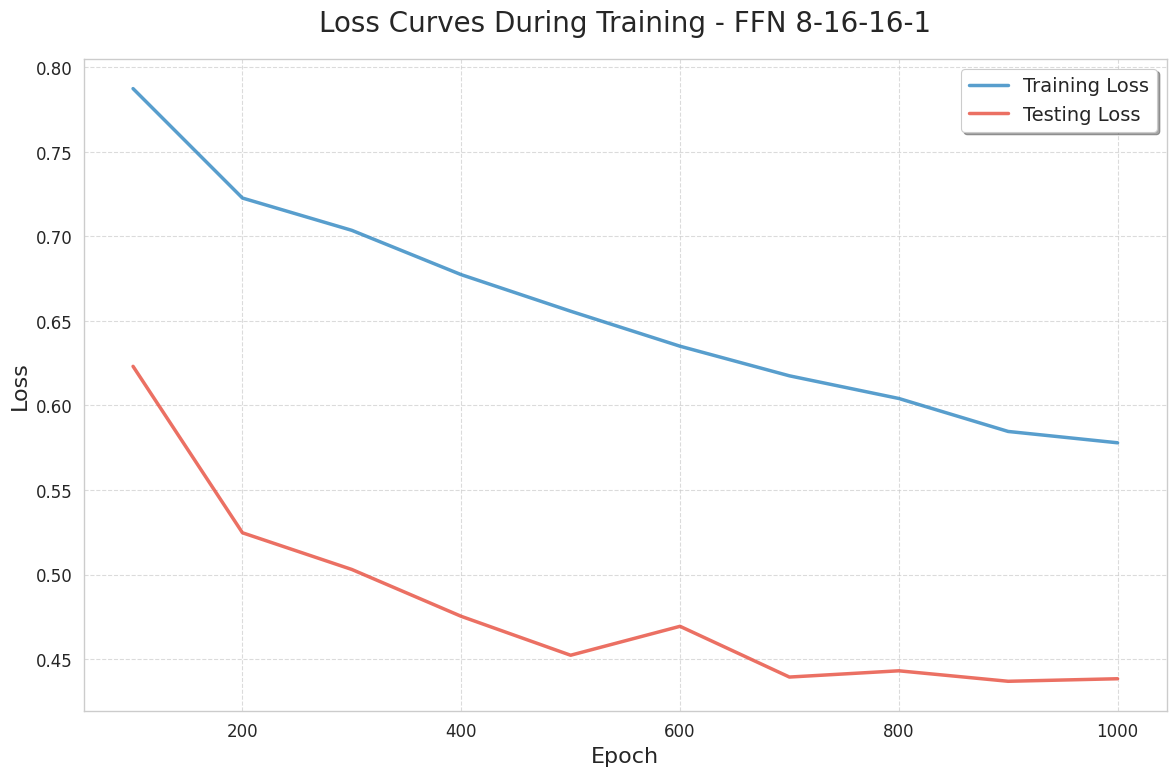

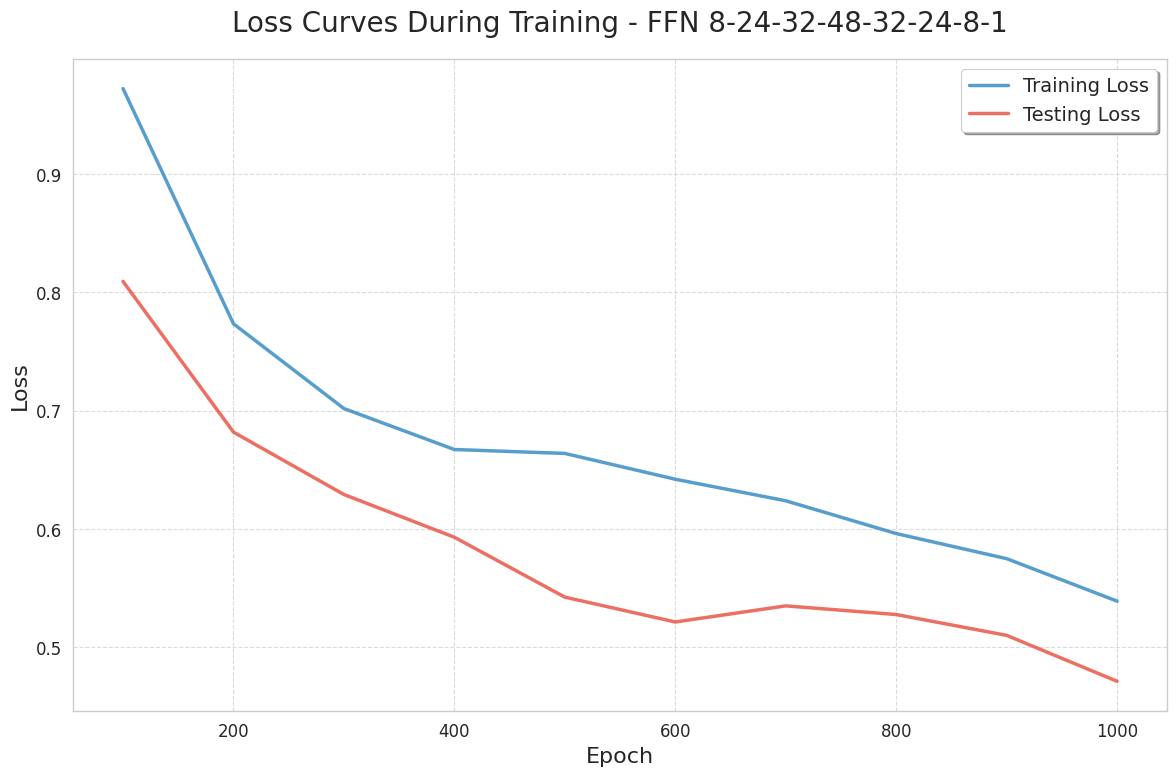

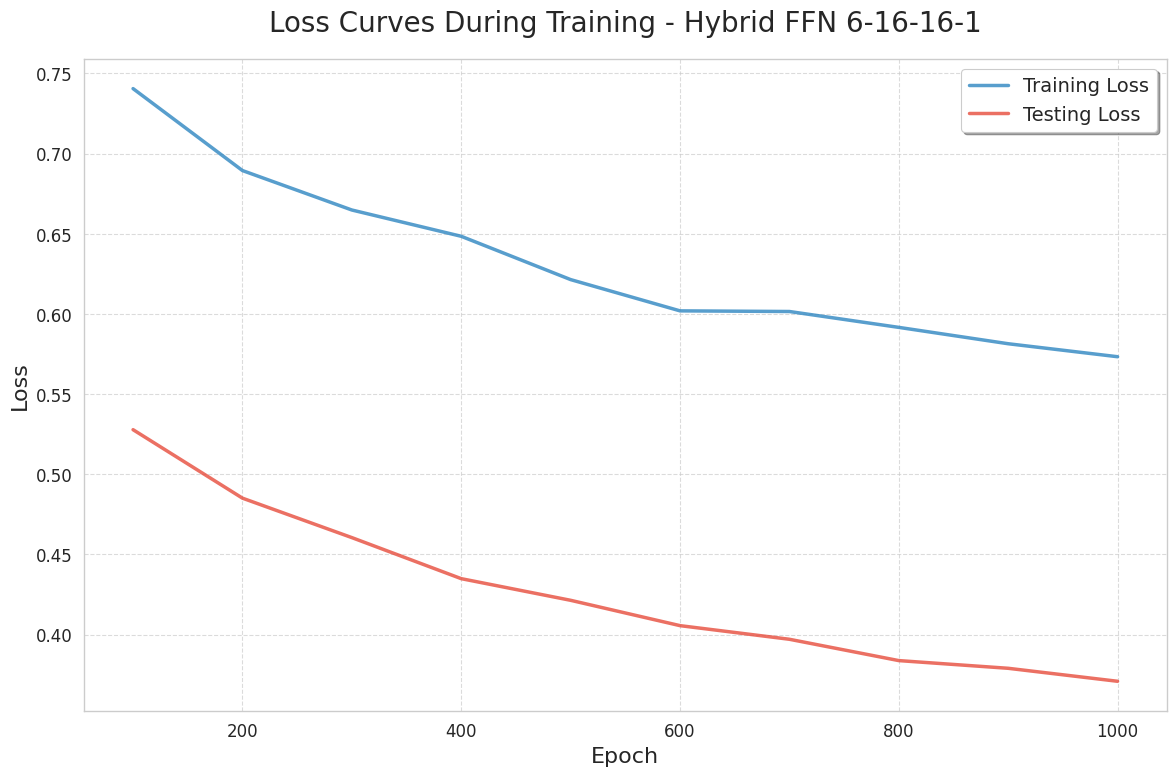

In [23]:
plot_loss_curves(data_frames[1], 
                 "outputs/plots/loss_curves_ffn_8_16_16_1.png",
                 "FFN 8-16-16-1"
                 )
plot_loss_curves(data_frames[2], 
                 "outputs/plots/loss_curves_ffn_8_24_32_48_32_24_8_1.png",
                 "FFN 8-24-32-48-32-24-8-1"
                 )
plot_loss_curves(data_frames[3], 
                 "outputs/plots/loss_curves_hybrid_6_16_16_1.png",
                 "Hybrid FFN 6-16-16-1"
                 )


[0.01, 0.1, 0.3, 0.5]
[np.float64(2.21), np.float64(10.32), np.float64(25.67), np.float64(40.15)]
[0.01, 0.1, 0.3, 0.5]
[np.float64(7.77), np.float64(58.45), np.float64(93.57), np.float64(97.59)]
[0.01, 0.1, 0.3, 0.5]
[np.float64(4.56), np.float64(58.18), np.float64(93.83), np.float64(97.86)]
[0.01, 0.1, 0.3, 0.5]
[np.float64(8.31), np.float64(60.59), np.float64(94.91), np.float64(98.12)]


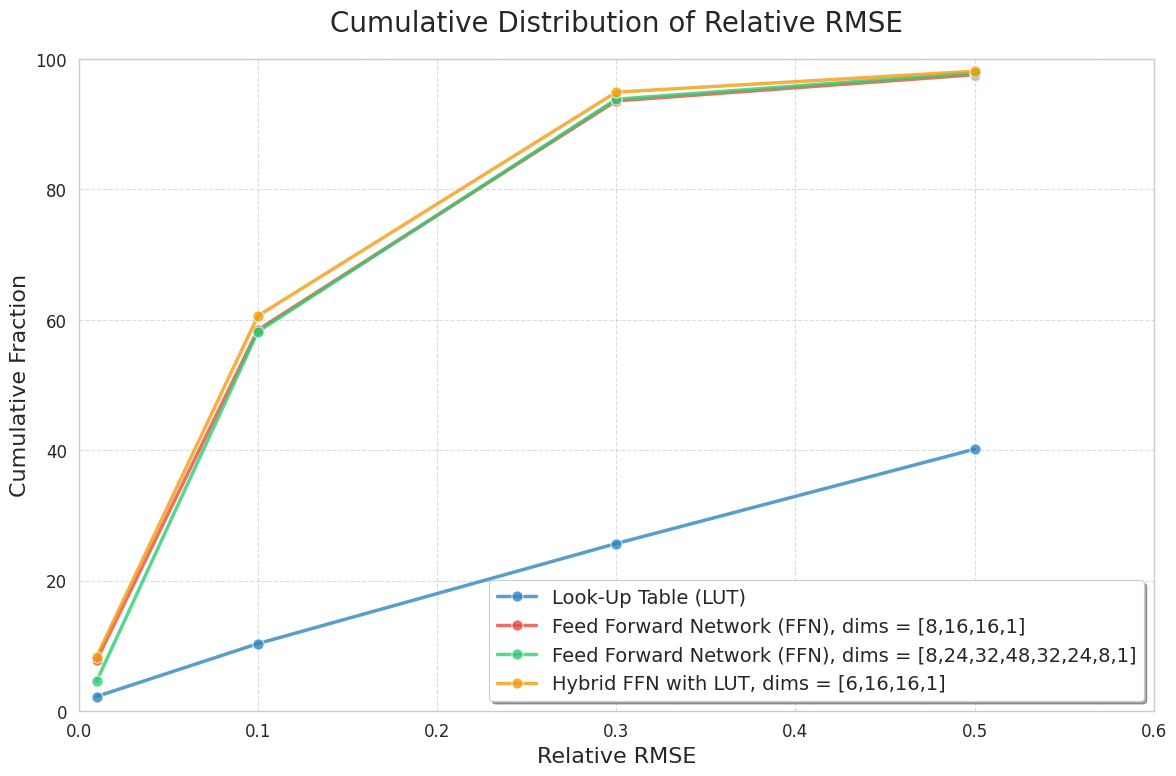

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def plot_cumulative_fractions(data_frames, model_names, plot_path, title="Cumulative Distribution of Relative Errors"):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from pathlib import Path

    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.5)
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['mathtext.fontset'] = 'stix'

    plt.figure(figsize=(12, 8))

    colors = ['#2E86C1', '#E74C3C', '#2ECC71', '#F39C12'] 

    thresholds = [0.01, 0.1, 0.3, 0.5] 

    for idx, (df, model_name) in enumerate(zip(data_frames, model_names)):
        last_row = df.iloc[-1]

        cumulative_fractions_0_01 = last_row.loc['cumulative_frac_0.01'] 
        cumulative_fractions_0_1 = last_row.loc['cumulative_frac_0.1']
        cumulative_fractions_0_3 = last_row.loc['cumulative_frac_0.3']
        cumulative_fractions_0_5 = last_row.loc['cumulative_frac_0.5']

        fractions = [
            cumulative_fractions_0_01,
            cumulative_fractions_0_1,
            cumulative_fractions_0_3,
            cumulative_fractions_0_5
        ]

        print(thresholds)
        print(fractions)

        # 绘制CDF曲线
        sns.lineplot(
            x=thresholds, 
            y=fractions,
            label=model_name,
            color=colors[idx % len(colors)],
            linewidth=2.5,
            marker='o', 
            markersize=8,
            alpha=0.8
        )

    # 设置标题和标签
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel('Relative RMSE', fontsize=16)
    plt.ylabel('Cumulative Fraction', fontsize=16)

    plt.xlim(0, max(thresholds) + 0.1)
    plt.ylim(0, 100)

    # 美化图例
    plt.legend(
        frameon=True,
        fancybox=True,
        shadow=True,
        fontsize=14,
        loc='lower right'
    )

    # 设置坐标轴
    plt.tick_params(axis='both', which='major', labelsize=12)

    # 添加网格线
    plt.grid(True, linestyle='--', alpha=0.7)

    # 设置边距
    plt.tight_layout()

    # 保存图片
    Path(plot_path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(
        plot_path,
        dpi=300,
        bbox_inches='tight',
        facecolor='white',
        edgecolor='none'
    )

    plt.show()
    plt.close()

model_names = [
    "Look-Up Table (LUT)",
    "Feed Forward Network (FFN), dims = [8,16,16,1]", 
    "Feed Forward Network (FFN), dims = [8,24,32,48,32,24,8,1]", 
    "Hybrid FFN with LUT, dims = [6,16,16,1]"
]

plot_cumulative_fractions(
    data_frames, 
    model_names,
    "outputs/plots/cumulative_fractions.png", 
    "Cumulative Distribution of Relative RMSE"
)
